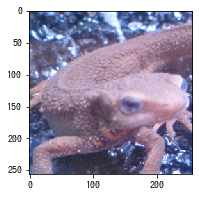

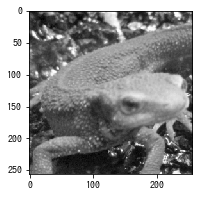

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("imori_256x256.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_Gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.show()
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 2)
plt.imshow(img_Gray, 'gray')
plt.show()

方法1

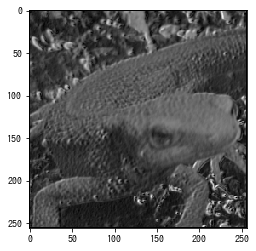

In [5]:
def filter2d(img, kernel):
    m, n = kernel.shape

    d = int((m-1) / 2)
    h, w = img.shape[0], img.shape[1]
    dst = np.zeros((h, w))
    for y in range(d, h-d):
        for x in range(d, w-d):
            dst[y][x] = np.sum(img[y-d: y+d+1, x-d: x+d+1] * kernel)
    return dst

kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 2, 1]])

kernel_y = np.array([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])

gray_x = filter2d(img_Gray, kernel_x)                   
gray_y = filter2d(img_Gray, kernel_y)
dst = np.sqrt(gray_x ** 2 + gray_y ** 2)

plt.imshow(dst, 'gray')

方法2

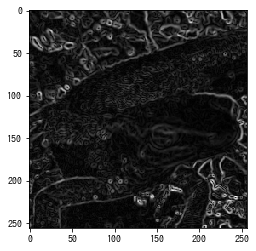

In [7]:
gray_x2 = cv2.Sobel(img_Gray, cv2.CV_32F, 1, 0, ksize=3)
gray_y2 = cv2.Sobel(img_Gray, cv2.CV_32F, 0, 1, ksize=3)
dst2 = np.sqrt(gray_x2 ** 2 + gray_y2 ** 2)

plt.imshow(dst2, 'gray')